MNIST = Modified National Institute of Standards and Technology. Large database of handwritten digits that is commonly used for training various image processing systems.

In [1]:
!nvidia-smi

Fri Oct 28 19:46:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P0    14W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import Lib
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf          #tensorflow achitecture
from tensorflow import keras     #Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.
import matplotlib.pyplot as plt  #graph plot
import numpy as np

In [25]:
# Load data from dataset and divide into training set and testing set
# (input_train , answer_train) , (input_test , answer_test) = keras.datasets.mnist.load_data()
(x_train_ori, y_train), (x_test_ori, y_test) = keras.datasets.mnist.load_data()

In [26]:
x_train_ori.shape

(60000, 28, 28)

5


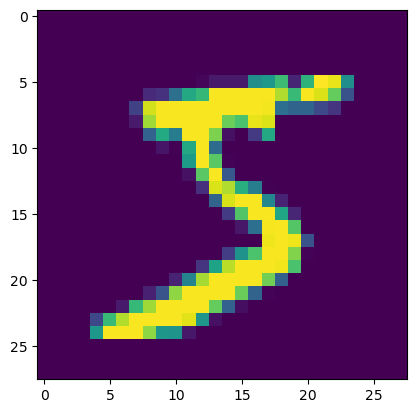

In [27]:
# Display the data from the set
y_train #answer of train data ( in (1 X N) vector )
print(y_train[0]) 
plt.imshow(x_train_ori[0])

In [24]:
#Reshape dataset to desired value by mapping 0 to 255 to only 0 to 1 and into one dimensional image
x_train = x_train_ori.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test_ori.reshape(-1, 28 * 28).astype("float32") / 255.0
print(np.shape(x_train))
print(x_train)
print(y_train)

(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 ... 5 6 8]


Creating the MODEL (3 ways of creating the model)

In [7]:
# 1st Method
model = keras.Sequential(
    [
        keras.Input(shape=(28 * 28)),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(10, activation= "sigmoid"),
    ]
)

In [ ]:
# 2nd Method
model = keras.Sequential()
model.add(keras.Input(shape=(784)))
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(10, activation = 'sigmoid'))

In [ ]:
# 3rd Method
inputs = keras.Input(shape=(784))
x = keras.layers.Dense(512, activation="relu")(inputs)
x = keras.layers.Dense(256, activation="relu")(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary() #print the overall preview of the model

Compile the model

In [8]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001), # choose optimizer and learning rate
    metrics=["accuracy"], # choose metrics
)

Start the TRAINNING

In [9]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=2) #start training by pass in training data, training answer, choose batch size, epochs, verbose

Epoch 1/10
1875/1875 - 4s - loss: 0.1862 - accuracy: 0.9425 - 4s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.0797 - accuracy: 0.9756 - 5s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.0556 - accuracy: 0.9824 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.0411 - accuracy: 0.9869 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.0325 - accuracy: 0.9892 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.0272 - accuracy: 0.9912 - 5s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.0232 - accuracy: 0.9923 - 5s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 5s - loss: 0.0211 - accuracy: 0.9929 - 5s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 4s - loss: 0.0177 - accuracy: 0.9942 - 4s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 5s - loss: 0.0184 - accuracy: 0.9941 - 5s/epoch - 2ms/step


Print the Plot of loss function and Print the Plot of accuracy

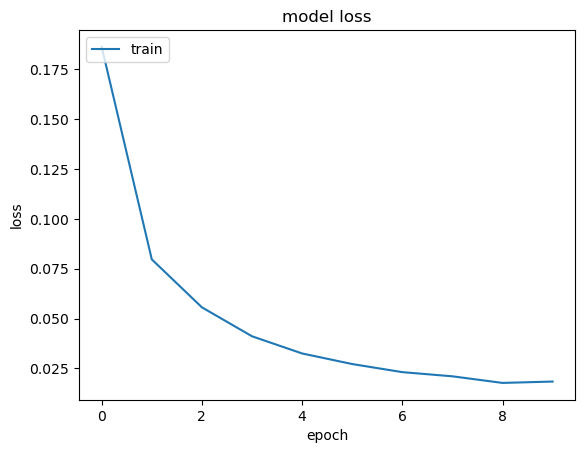

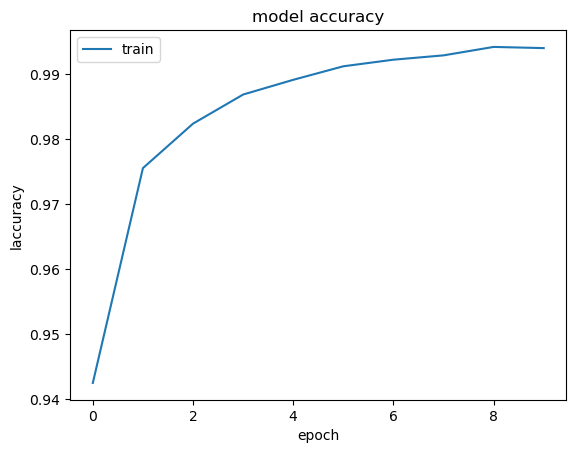

In [15]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('laccuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Start testing the Trained Model using the test data to evaluate model

In [16]:
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

313/313 - 0s - loss: 0.0923 - accuracy: 0.9782 - 472ms/epoch - 2ms/step


[0.09230036288499832, 0.9782000184059143]

View the trained weight and the bias

In [ ]:
weight = model.get_weights()[0]
print(weight)
print("----------------------------")
bias = model.get_weights()[1]
print(bias)

Start testing the model by use it to predicting the test

In [17]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


(28, 28)


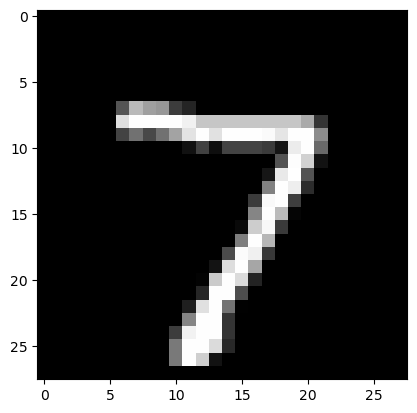

In [19]:
image = x_test_ori[0]# plot the sample
print(np.shape(image))
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
np.argmax(predictions[0])

In [ ]:
y_test[0]

In [23]:
import cv2
cap = cv2.VideoCapture(0)
# cap.set(3,28) # adjust width
# cap.set(4,28) # adjust height

while True:
    success, img = cap.read()
    img = cv2.resize(img, (28, 28))
    print(np.shape(img))
    cv2.imshow("Webcam", img) # This will open an independent window
    
    img = img.reshape(-1, 28 * 28).astype("float32") / 255.0
    print(np.shape(img))

    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        cap.release()
        break
        
cv2.destroyAllWindows() 
cv2.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the window doesn't close

(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(3, 784)
(28, 28, 3)
(

-1